### 모듈 가져오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns 
import plotly.express as px
from collections import Counter
import matplotlib as mpl
import squarify
from wordcloud import WordCloud


### project_merge_result : 워크넷 + 원티드 + 인크루트

#### 다양한 종류별로 시각화

In [3]:
df = pd.read_csv("/home/kkyu/amr_ws/eda/data/project_merge_result.csv")
df

,기업이름,고용형태,연봉,기업주소,키워드,담당업무,인덱스,필요역량
0,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,[2년 이상] 자율주행 Front-End 개발자,1,"['학사', '기획', '자율주행', '웹', '공학', '3D', 'Linux',..."
1,뷰런테크놀로지,-,-,"서초구 강남대로 311, 19층",자율주행,자율주행 인지 개발자,2,"['석사', '학사', '자율주행', '컴퓨터공학', 'computer', 'C',..."
2,씨엔비스,4년,-,"경기도 성남시 수정구 창업로 43, 판교 글로벌비즈센터 A동 907~910호",자율주행,자율주행 인지 개발자,3,"['석사', '자율주행', '논문', 'C', '분석', '딥러닝', '시스템', ..."
3,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,자율주행 SW 엔지니어,4,"['공학', '자율주행', '제어', 'C', '딥러닝', '프로젝트', '학위',..."
4,베스텔라랩,2년,연봉업계평균이상,안양시 동안구 엘에스로116번길 118 안양2차 SKV1 Center,자율주행,자율주행 연구원(경기/대구)(전문연구요원가능),5,"['기획', '전공자', '자율주행', 'Embedded', '제어', 'C', '..."
...,...,...,...,...,...,...,...,...
939,딥파인,경력 3~15년,회사내규에 따름,서울 용산구 한강대로30길 25,딥러닝,Visual SLAM(vSLAM) 개발자,940,"['Computer', 'C', '3D', 'Vision', '성능', '최적화',..."
940,다이얼로그디자인에이전시,경력 5~7년,회사내규에 따름,서울 송파구 송파대로 201 A동 1014호,딥러닝,[5년 이상 리더급] 풀스택 소프트웨어 엔지니어,941,"['컴퓨터공학', '웹', '데이터', '시스템', '엔지니어', 'AI', 'Py..."
941,피처링,경력 2~10년,회사내규에 따름,"서울 강남구 테헤란로 419, 15층 (강남파이낸스플라자)",딥러닝,서버 및 백엔드 개발자 채용,942,"['웹', '데이터', '시스템', 'AI', 'Python', '설계']"
942,딥엑스,경력 5~20년,회사내규에 따름,경기 성남시 분당구 판교역로241번길 20 5층,딥러닝,[AI반도체] 딥엑스 SoC ASIC 설계 Engineer,943,"['시스템', 'AI', 'python', '인공지능', 'Linux', '설계']"


### 로봇제어와 로봇 제어 두가지 형태가 존재하므로 하나로 결합

In [4]:
df['키워드'] = df['키워드'].str.replace('로봇제어', '로봇 제어')
df

,기업이름,고용형태,연봉,기업주소,키워드,담당업무,인덱스,필요역량
0,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,[2년 이상] 자율주행 Front-End 개발자,1,"['학사', '기획', '자율주행', '웹', '공학', '3D', 'Linux',..."
1,뷰런테크놀로지,-,-,"서초구 강남대로 311, 19층",자율주행,자율주행 인지 개발자,2,"['석사', '학사', '자율주행', '컴퓨터공학', 'computer', 'C',..."
2,씨엔비스,4년,-,"경기도 성남시 수정구 창업로 43, 판교 글로벌비즈센터 A동 907~910호",자율주행,자율주행 인지 개발자,3,"['석사', '자율주행', '논문', 'C', '분석', '딥러닝', '시스템', ..."
3,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,자율주행 SW 엔지니어,4,"['공학', '자율주행', '제어', 'C', '딥러닝', '프로젝트', '학위',..."
4,베스텔라랩,2년,연봉업계평균이상,안양시 동안구 엘에스로116번길 118 안양2차 SKV1 Center,자율주행,자율주행 연구원(경기/대구)(전문연구요원가능),5,"['기획', '전공자', '자율주행', 'Embedded', '제어', 'C', '..."
...,...,...,...,...,...,...,...,...
939,딥파인,경력 3~15년,회사내규에 따름,서울 용산구 한강대로30길 25,딥러닝,Visual SLAM(vSLAM) 개발자,940,"['Computer', 'C', '3D', 'Vision', '성능', '최적화',..."
940,다이얼로그디자인에이전시,경력 5~7년,회사내규에 따름,서울 송파구 송파대로 201 A동 1014호,딥러닝,[5년 이상 리더급] 풀스택 소프트웨어 엔지니어,941,"['컴퓨터공학', '웹', '데이터', '시스템', '엔지니어', 'AI', 'Py..."
941,피처링,경력 2~10년,회사내규에 따름,"서울 강남구 테헤란로 419, 15층 (강남파이낸스플라자)",딥러닝,서버 및 백엔드 개발자 채용,942,"['웹', '데이터', '시스템', 'AI', 'Python', '설계']"
942,딥엑스,경력 5~20년,회사내규에 따름,경기 성남시 분당구 판교역로241번길 20 5층,딥러닝,[AI반도체] 딥엑스 SoC ASIC 설계 Engineer,943,"['시스템', 'AI', 'python', '인공지능', 'Linux', '설계']"


### < 키워드 비중 시각화 >

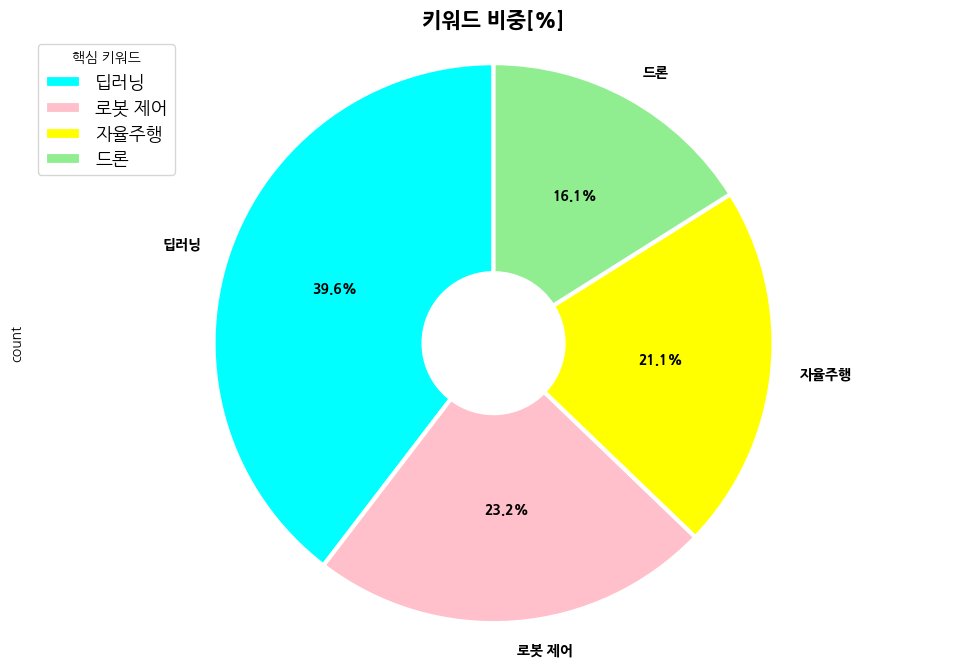

In [5]:
df = pd.read_csv("/home/kkyu/amr_ws/eda/data/project_merge.csv")

df['키워드'] = df['키워드'].str.replace('로봇제어', '로봇 제어')

# 필요한 열을 선택 (예: "필요역량")
keyword= df["키워드"]

# 단어별로 카운트를 세기
skills_counts = pd.Series(keyword).value_counts()

# Pie plot
plt.figure(figsize=(12, 8))
wedgeprops = {'width' : 0.75, 'edgecolor' : 'w', 'linewidth' : 3}
explode = [0.03] * 4
colors = ['aqua', 'pink', 'yellow', 'lightgreen']
skills_counts.plot.pie(autopct='%1.1f%%', startangle=90, textprops = {'size' : 10, 'weight': 'bold'} , wedgeprops = wedgeprops, colors = colors)
plt.title('키워드 비중[%]', size = 15, weight = 'bold')
plt.axis('equal')
plt.legend(loc = 'upper left', fontsize = 13, title = '핵심 키워드')
plt.show()

### <필요역량 빈도수 높은 단어 by Word Cloud >

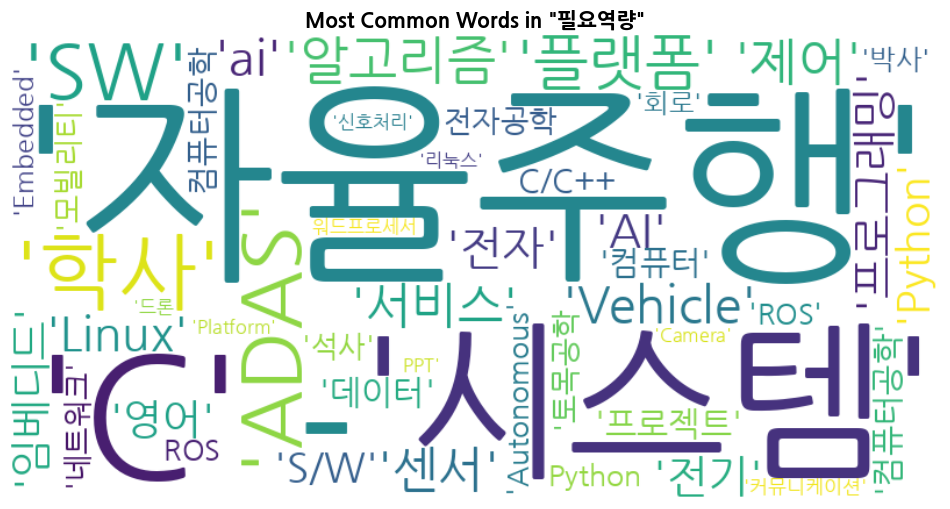

In [6]:
df['필요역량'] = df['필요역량'].replace({'\[\]|\[|\]': ''}, regex=True).str.strip()
words = df['필요역량'].str.split(',').explode().str.strip()
most_common_words = words.value_counts().head(50)

font_path = "/path/to/NanumGothic.ttf" 
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path,
    min_font_size=10,  
    collocations=False  
).generate_from_frequencies(most_common_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Most Common Words in "필요역량"', size=15, weight='bold')
plt.show()


### <필요역량 비중 >
- word cloud에서 추출한 단어 선정 
- pie plot 및 bar plot으로 확인

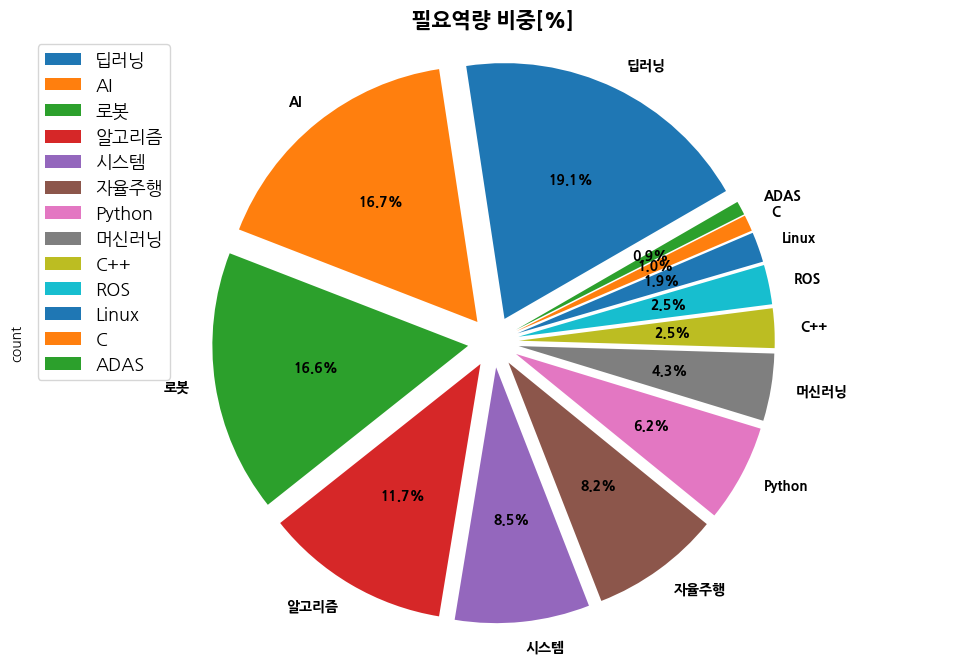

/tmp/ipykernel_14887/2081255696.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette="viridis")


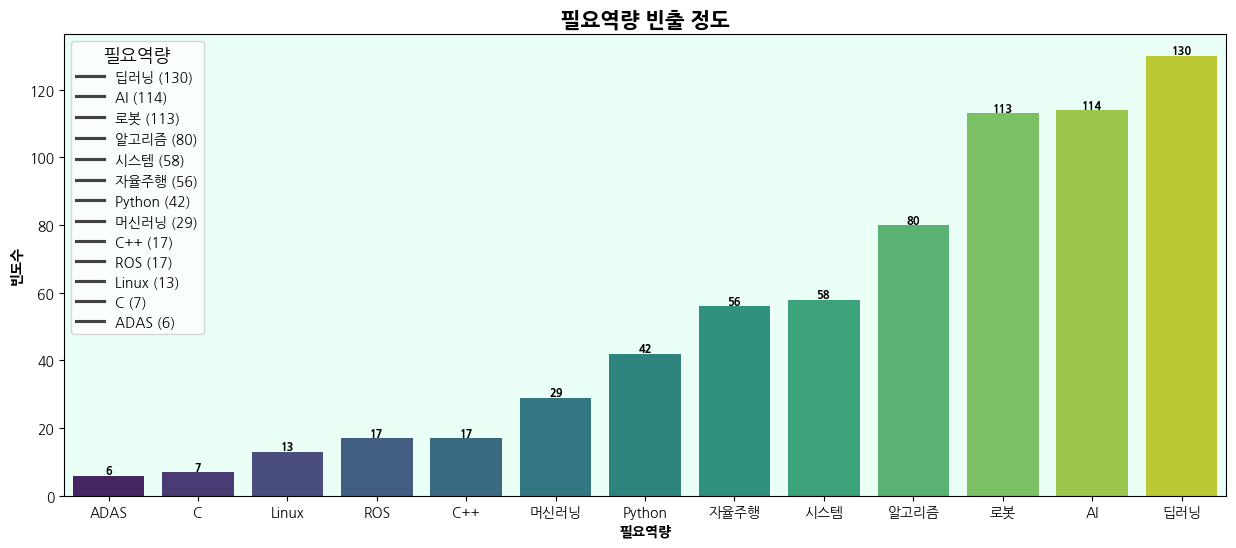

In [7]:
plt.rcParams['font.family'] = 'NanumGothic'

required_skills_column = df["필요역량"]
selected_keywords = ['ROS', 'Python', 'C', 'C++', 'AI', '딥러닝', '자율주행', '로봇', 'Linux', 'Vehicle', '머신러닝', 'ADAS', '알고리즘', '시스템']

selected_skills = [skill for skills_list in required_skills_column.dropna() for skill in skills_list.split() if skill in selected_keywords]
skills_counts = pd.Series(selected_skills).value_counts()
explode = [0.1] * len(skills_counts)

# Pie plot
plt.figure(figsize=(12, 8))
skills_counts.plot.pie(autopct='%1.1f%%', startangle=30, textprops={'size': 10, 'weight': 'bold'}, explode = explode)
plt.title('필요역량 비중[%]', size=15, weight='bold')
plt.axis('equal')
plt.legend(labels=skills_counts.index, loc='upper left', fontsize=13)  # Adjusted legend
plt.show()

# Bar plot
fig, ax = plt.subplots(figsize=(15, 6))
sorted_counts = skills_counts.sort_values(ascending=True)
bar_plot = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette="viridis")

for i, v in enumerate(sorted_counts):
    bar_plot.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8, weight='bold')

ax.set_facecolor('#eafff5')
plt.title('필요역량 빈출 정도', size=15, weight='bold')
plt.xlabel('필요역량', weight='bold')
plt.ylabel('빈도수', weight='bold')

legend_labels = [f"{skill} ({count})" for skill, count in zip(sorted_counts.index[::-1], sorted_counts.values[::-1])]
plt.legend(legend_labels, title="필요역량", title_fontsize='13', loc='upper left')
plt.show()


### < 필요역량 빈출정도 by squarify treemap>

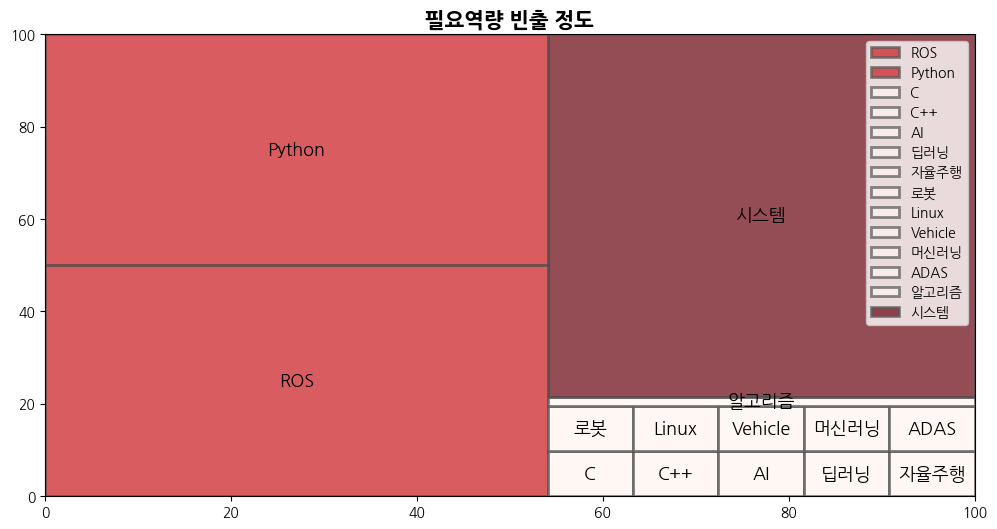

In [8]:
keyword_counts = Counter(' '.join(df['필요역량']).split(','))

selected_keywords = ['ROS', 'Python', 'C', 'C++', 'AI', '딥러닝', '자율주행', '로봇', 'Linux', 'Vehicle', '머신러닝', 'ADAS', '알고리즘', '시스템']
selected_keyword_counts = {keyword: keyword_counts[keyword] for keyword in selected_keywords}

# 색상 매핑을 위한 정규화 설정
norm = mpl.colors.Normalize(vmin=min(selected_keyword_counts.values()), vmax=max(selected_keyword_counts.values()))
# 정규화된 값에 기반한 색상 생성
colors = [mpl.cm.Reds(norm(value)) for value in selected_keyword_counts.values()]

fig, ax = plt.subplots(figsize=(12, 6))
sizes = [max(0.1, value) for value in selected_keyword_counts.values()]

# squarify 라이브러리를 사용하여 트리맵 생성
squarify.plot(label=selected_keyword_counts.keys(),
              sizes=sizes,
              color=colors,
              bar_kwargs=dict(linewidth=2, edgecolor="#555"),
              alpha=.7,
              ax=ax, text_kwargs = {'fontsize' : 13})

ax.set_title('필요역량 빈출 정도', size = 15, weight = 'bold')
ax.legend()
plt.show()

### < 키워드 빈출정도 by plotly treemap >

In [20]:
df['키워드'] = df['키워드'].replace('로봇제어', '로봇 제어')

keyword_counts = df['키워드'].value_counts()

df_plotly = pd.DataFrame({'키워드': keyword_counts.index, 'Count': keyword_counts.values})

fig = px.treemap(df_plotly, path=['키워드'], values='Count',
                 color='Count', color_continuous_scale='reds',
                 title='키워드 빈출 정도')
fig.show()

### < 신입 및 경력 비중 by pie plot>

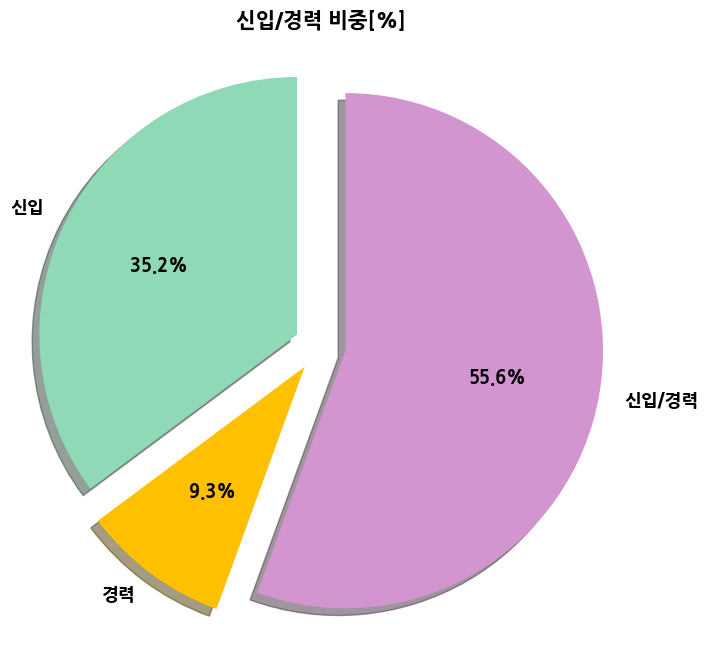

In [10]:
name = df["기업이름"]
type = df["고용형태"]

new = (type == '신입').sum()
old = (type == '경력').sum()
both = (type == '신입/경력').sum()

# Pie plot
plt.figure(figsize=(8, 8))
explode = [0.1, 0.1, 0.1] 
colors = ['#8fd9b6', '#ffc000', '#d395d0']
plt.pie([new, old, both], labels=['신입', '경력', '신입/경력'], autopct='%1.1f%%', startangle=90, shadow=True, explode=explode, colors = colors, textprops={'weight': 'bold', 'fontsize' : 13})
plt.title('신입/경력 비중[%]', fontsize = 15, weight = 'bold')
plt.axis("equal")
plt.show()


### 잡플래닛과 (워크넷,인크루트,원티드) 합친 데이터 비교해서 기업이름 일치하는 잡플래닛값들만 불러온 결과물

- 불용어 처리 完
- dtype 변경 및 값 수정 
- 기업이름 (주) 제거
- 시각화에 적절하게 데이터프레임 가공 完

In [11]:
# pj_innerjoin -> pj_join
df3 = pd.read_csv("/home/kkyu/amr_ws/eda/data/pj_join.csv")
df3

,기업이름,키워드,연봉,평점,분야
0,인피닉,자율주행,2542,2.1,IT
1,슈어소프트테크,딥러닝,3948,3.1,IT
2,크래프톤,딥러닝,5179,3.4,IT
3,파수,딥러닝,4298,3.1,IT
4,와디즈,딥러닝,3852,2.9,IT
...,...,...,...,...,...
105,토페스,딥러닝,2695,2.7,전기/전자/제어
106,엠투아이코퍼레이션,로봇제어,3948,3.6,전기/전자/제어
107,캔탑스,딥러닝,3755,2.7,전기/전자/제어
108,오토엘,로봇제어,5452,2.8,전기/전자/제어


### 평점,연봉,분야별 시각화

- regplot : scatter plot, regression line, confidence band(신뢰구간,대역)를 한 번에 그리는 기능
- 평점,연봉,분야 컬럼을 이용

/tmp/ipykernel_9603/1950576068.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_9603/1950576068.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_9603/1950576068.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_9603/1950576068.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



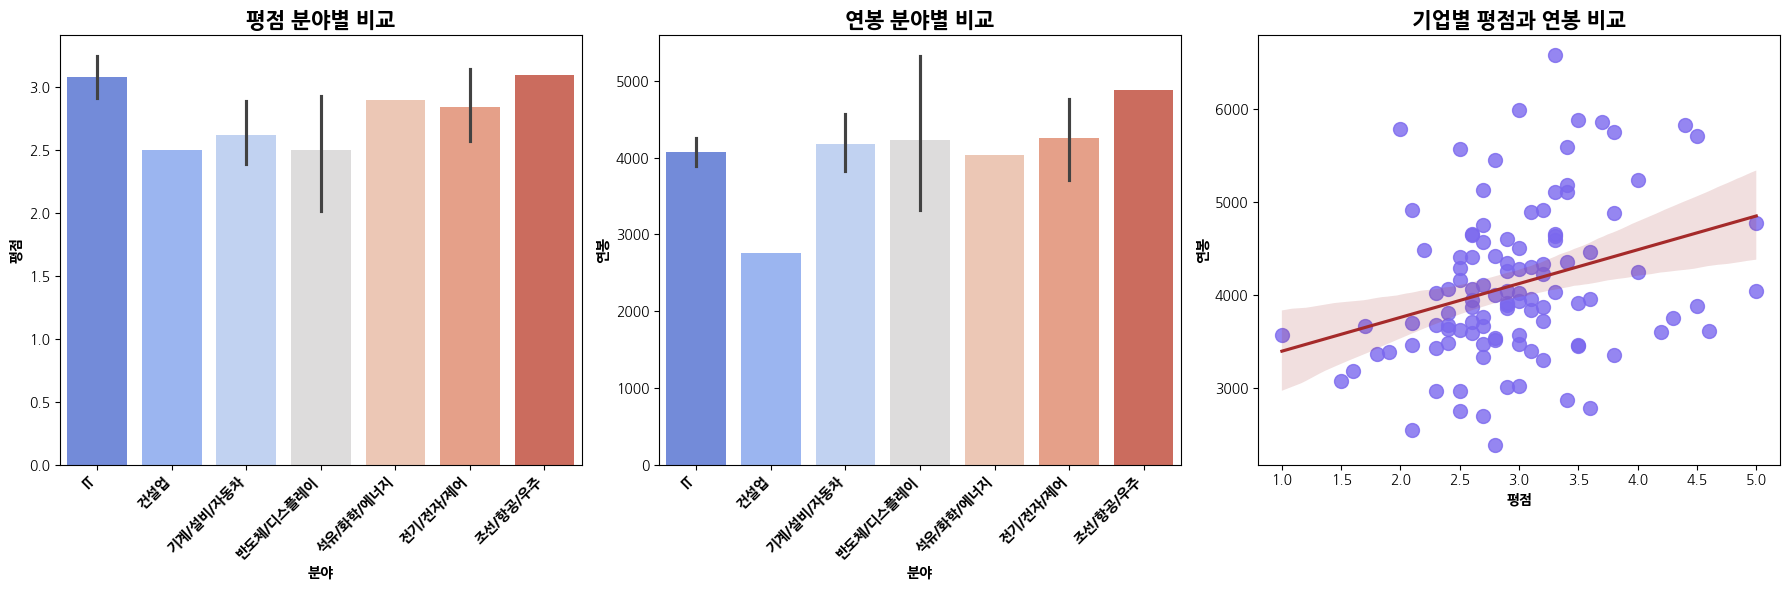

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

# 평점 분야별 비교
sns.barplot(x='분야', y='평점', data=df3, ax=axes[0], palette='coolwarm')
axes[0].set_title('평점 분야별 비교', weight = 'bold', fontsize = 15)
axes[0].set_xlabel('분야', weight = 'bold')
axes[0].set_ylabel('평점', weight = 'bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', weight = 'bold')

# 연봉 분야별 비교
sns.barplot(x='분야', y='연봉', data=df3, ax=axes[1], palette='coolwarm')
axes[1].set_title('연봉 분야별 비교', weight = 'bold', fontsize = 15)
axes[1].set_xlabel('분야', weight = 'bold')
axes[1].set_ylabel('연봉', weight = 'bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right', weight = 'bold')

# 기업별 평점과 연봉 비교
sns.regplot(x='평점', y='연봉', data=df3, scatter_kws={'s': 100}, line_kws={'color': 'brown'}, ax=axes[2], color = 'mediumslateblue')
axes[2].set_title('기업별 평점과 연봉 비교', weight = 'bold', fontsize = 15)
axes[2].set_xlabel('평점', weight = 'bold')
axes[2].set_ylabel('연봉', weight = 'bold')

plt.tight_layout()
plt.show()


### 3개의 그래프 분리 

/tmp/ipykernel_12856/3347325620.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='분야', y='평점', data=df3, palette='coolwarm')


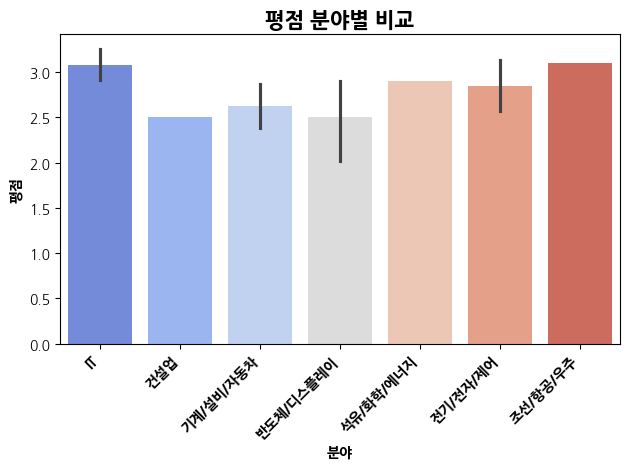

In [ ]:
sns.barplot(x='분야', y='평점', data=df3, palette='coolwarm')
plt.title('평점 분야별 비교', weight='bold', fontsize=15)
plt.xlabel('분야', weight='bold')
plt.ylabel('평점', weight='bold')
plt.xticks(rotation=45, ha='right', weight='bold')
plt.tight_layout()

plt.show()

/tmp/ipykernel_12856/513080371.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='분야', y='연봉', data=df3, palette='coolwarm')


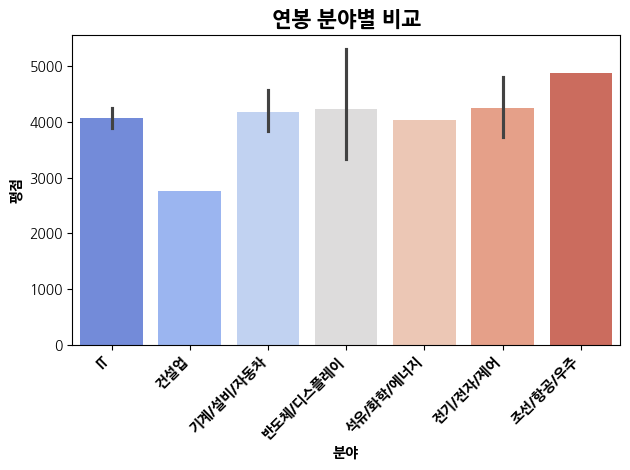

In [ ]:
sns.barplot(x='분야', y='연봉', data=df3, palette='coolwarm')
plt.title('연봉 분야별 비교', weight='bold', fontsize=15)
plt.xlabel('분야', weight='bold')
plt.ylabel('평점', weight='bold')
plt.xticks(rotation=45, ha='right', weight='bold')
plt.tight_layout()

plt.show()

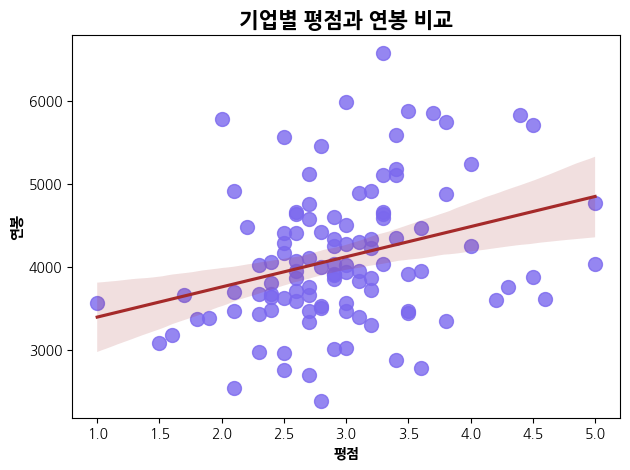

In [ ]:
sns.regplot(x='평점', y='연봉', data=df3, scatter_kws={'s': 100}, line_kws={'color': 'brown'}, color='mediumslateblue')
plt.title('기업별 평점과 연봉 비교', weight='bold', fontsize=15)
plt.xlabel('평점', weight='bold')
plt.ylabel('연봉', weight='bold')
plt.tight_layout()

plt.show()

### 기업만족도와 급여의 상관관계 by kde plot

<Figure size 1000x600 with 0 Axes>

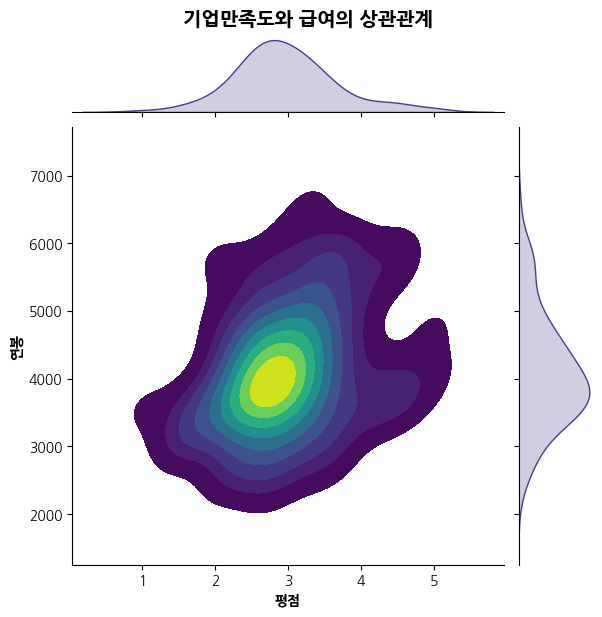

In [ ]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='평점', y = '연봉', data = df3, kind = 'kde', cmap = 'viridis', color = 'darkslateblue', fill = True)
plt.suptitle('기업만족도와 급여의 상관관계', y = 1.02, weight = 'bold', fontsize = 14)
plt.xlabel('평점', weight = 'bold')
plt.ylabel('연봉', weight = 'bold')
plt.show()

